Index(['Full Name', 'Email address', 'Gender', 'Hometown',
       'Currently living in ', 'Your Decision', 'Looking for a room mate?',
       'Course ',
       'Please Enter your Branch (If it was not listed in drop down, else leave blank)',
       'Are you open to other branch room mate?',
       'Areas of Interest (In NEU )', 'University Name (UG)',
       'Work experience (In years)',
       'Approximate distance from University (in miles)',
       'Person per room including you ( select all that applies)',
       'Apartment type', 'Can afford a monthly rent  of (Per person)',
       'Facilities required ', 'Alcohol consumption', 'Smoking',
       'Any special preferences for room mates ?', 'Food preference',
       'Culinary skills ', 'I am looking for a room mate', 'Your Hobbies',
       'Facebook profile link (optional)', 'i20 amount', 'VISA status',
       'Planned VISA interview date', 'VISA consulate - city ',
       'Do you need a Flight mate?', 'If yes, then Flight Date?',
 

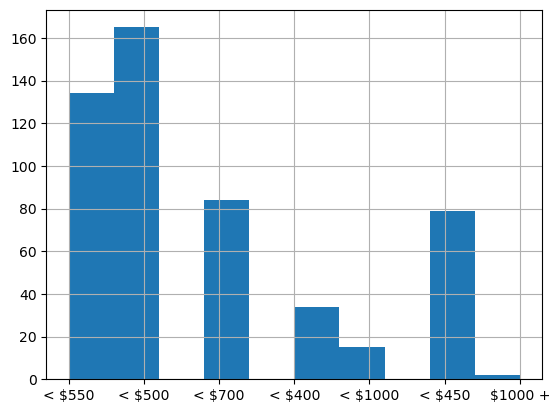

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#Import Data
original_data = pd.read_excel('find_my_buddy.csv.xlsx', sheet_name='Buddy Sheet')
#What information do we have?
type(original_data)
print(original_data.columns)
#Do some of the features make any difference?
original_data['Any other comments  ?']
#Clearly this feature is not going to help us in any way. At least not uniformly across every data point. So I will drop this for now.
#Dropping columns which intuitively dont make a difference right now. 'Email address' 'Your Decision' 'Areas of Interest (In NEU )' 'Facebook profile link (optional)' 'i20 amount' 'VISA status' 'Planned VISA interview date' 'VISA consulate - city ' 'Do you need a Flight mate?', 'If yes, then Flight Date?' 'Any other comments ?' 'Any other comments ?'

#then
original_data = original_data.drop(labels = [ 'i20 amount', 'VISA status', 'Planned VISA interview date', 'VISA consulate - city ',
       'Do you need a Flight mate?', 'If yes, then Flight Date?',
       'Any other comments  ?', 'Email address', 'Your Decision', 'Areas of Interest (In NEU )', 'Facebook profile link (optional)'], axis = 1)
original_data
#Dont drop names. Keep it for recommendations later.
#Start categorizing variables
#Male, Female to 0, 1
original_data['Gender'].replace(['Male','Female'], [0, 1], inplace = True)
original_data = original_data.drop(['Facilities required '], axis = 1)
original_data.columns
#Change names to more accessible ones
original_data.columns = ['name','gender', 'hometown', 'current_city',
       'need_roommate', 'course',
       'edu_prog',
       'open_to_other_branch', 'undergrad_uni',
       'work_ex',
       'dist_from_uni',
       'person_per_room',
       'apt_type', 'rent_budget',
       'alcohol', 'smoking',
       'special_pref', 'food_pref',
       'cul_skills ', 'looking_for_roommate', 'hobbies']
original_data = original_data.drop(['edu_prog'], axis = 1)

#Start exploring each column and encoding them wherever needed

#1) Course
original_data.course.unique()
one_hot_course = pd.get_dummies(original_data['course'])
# Join one hot vectors of course and delete original
original_data = original_data.join(one_hot_course)

original_data = original_data.drop('course', axis = 1)
# Drop one vague reading
original_data = original_data.drop(522)
original_data

#2) Hometown and current city
original_data['hometown'] = original_data['hometown'].str.strip().str.lower()
original_data['current_city'] = original_data['current_city'].str.strip().str.lower()
print('Proportion of people currently in the same city as their hometown:')
np.sum(original_data['hometown'] == original_data['current_city'])/len(original_data)

#3) Undergrad universities
original_data['undergrad_uni'] = original_data['undergrad_uni'].str.strip().str.lower()
pd.value_counts(original_data['undergrad_uni'])
#Theres a lot of noise and overlap here cause people wrote their college names and university names as 2 separate entities. Trying to capture that information.
mask = original_data.undergrad_uni.str.contains('mumbai')
mask
new_unis = np.array(original_data['undergrad_uni'])
# List of universities
new_unis
# Dataframe of observations where theres any NA value anywhere.
original_data[original_data.isnull().any(axis=1)]
# Second most popular city after Mumbai is Bangalore
original_data[original_data['current_city'] == 'bangalore']
print("Counts of NA's in every feature:")
original_data.isnull().sum()

#4) Open to roommates from other branch
pd.value_counts(original_data['open_to_other_branch'])
# Fill NA's with the most frequent value
original_data.open_to_other_branch = original_data.open_to_other_branch.fillna('Yes')
# Check nulls now
original_data.open_to_other_branch.isnull().sum()

#5) Undergrad university
original_data.undergrad_uni.value_counts()
'''This feature is too messy right now cause people were allowed to manually write into this. 
So too many variations for the same universities like people repeating names, using abbreviations etc.
Can let go of this bias because hometown and current city capture this information already.'''
original_data = original_data.drop(labels=['undergrad_uni'], axis = 1)
original_data.isnull().sum()

#6) Work experience
#This is crucial since this data does not contain age as a feature. Years of work experience+22(avg graduation age) can indicate age of users.

original_data.work_ex.value_counts()
# Get non null values, average them and change work ex to avg work ex value
work_ex_avg = np.average(original_data.work_ex[original_data.work_ex.notnull()])

original_data.work_ex = original_data.work_ex.fillna(work_ex_avg)
original_data.work_ex.isnull().sum()

#7) Distance from university
# Get non null values, average them and change distance to avg distance value
# Fix two vague values
#original_data.set_value(206, 'dist_from_uni', '<10')
original_data.at[206, 'dist_from_uni']='<10'
#original_data.set_value(130, 'dist_from_uni', '<10')
original_data.at[130, 'dist_from_uni']='<10'
# Change distance to int
original_data.dist_from_uni[original_data.dist_from_uni.notnull()] = [int(d[1:]) for d in original_data.dist_from_uni[original_data.dist_from_uni.notnull()]]
original_data.dist_from_uni.isnull().sum()
# Get avg distance students prefer staying from university
dist_avg = np.sum(original_data.dist_from_uni[original_data.dist_from_uni.notnull()])/len(original_data.dist_from_uni\
                                                                                [original_data.dist_from_uni.notnull()])
dist_avg
original_data['dist_from_uni'] = original_data['dist_from_uni'].apply(float)

original_data.dist_from_uni = original_data.dist_from_uni.fillna(dist_avg)
original_data.dist_from_uni.isnull().sum()
original_data.isnull().sum()

#8) Person Per Room
#Have to handle number of people per room. Hall indication is by text and all other numbers indicate number of people per room. So I've created a new binary feature indicating if a user is okay with staying in the living room or no.

hall_ind = 'I can stay in Hall too'
hall_yes_no = [1 if hall_ind in str(d) else 0 for d in original_data.person_per_room]
original_data['hall_yes_no'] = hall_yes_no
original_data
#Does creating dummy variables help?

pd.get_dummies(original_data.person_per_room)
#Too many new features. Cant do this.

#Save this for further work.

original_data.to_csv('original_data_2.csv')
#Start new here with semi-cleaned CSV
original_data = pd.read_csv('original_data_2.csv', index_col=0)
original_data
original_data.isnull().sum()
#Getting back to person per room feature.

# Taking a look at which indices contain just the hall indicator, and printing them. Then change it to 2 (avg)
for ind, i in enumerate(original_data.person_per_room):
    if len(str(i).split(',')) == 1 and hall_ind in str(i):
        print(ind, i)
        #original_data.set_value(ind, 'person_per_room', 2)
        original_data.at[ind, 'person_per_room']=2
#I've decided to change the feature to mke it easier to use. Instead of the current range of number of people, keep only max number of people. That anyway gives us the range and doesnt lead to an increase in dimensions.

nansss = 0
max_ppr = []
for d in original_data.person_per_room:
    try:    
        if hall_ind in str(d):
            new_d = str(d).split(',')
            del(new_d[-1])
            max_per_room = (max(int(j) for j in new_d))

        else:
            max_per_room = (max(int(j) for j in str(d).split(',')))
        print(max_per_room)
        max_ppr.append(max_per_room)
        
    except:
        nansss += 1
        max_ppr.append(d)
#         print(d)
print('NAN COUNT:', nansss)
print('Length of ppr:', len(max_ppr))
original_data['max_ppr'] = max_ppr

original_data = original_data.drop(labels=['person_per_room'], axis = 1)

# Now fill NA's with avg value of maximum number of people per room.
original_data.max_ppr = original_data.max_ppr.fillna(np.average(original_data.max_ppr[original_data.max_ppr.notnull()]))
original_data.isnull().sum()
#9) Apartment type
#Create dummy variable but by hand.

original_data.apt_type = original_data.apt_type.fillna('Studio, 1BHK, 2 BHK, 3BHK, 4 BHK')
apt_types = ['1BHK', '2 BHK', '3BHK', '4 BHK', 'Studio']
for a in apt_types:
    original_data[a] = [0]*len(original_data)
original_data
#Insert indicator values for apt type.

for ind, apt_choice in enumerate(original_data.apt_type):
# try:
    for at in apt_types:
        if at in str(apt_choice):
            #original_data.set_value(ind, at, 1)
            original_data.at[ind, at]=1
            
#     except:
#         print(apt_choice)
original_data.isnull().sum()
#10) Rent budget
#What are peoples budgets like?

original_data.rent_budget.value_counts()
import matplotlib.pyplot as plt
x = original_data.rent_budget.value_counts()
original_data.rent_budget.hist()
#Change budget to integer by taking just the numeric values.

original_data.rent_budget = original_data.rent_budget.fillna('< $500')
for ind, budget in enumerate(original_data.rent_budget):
    try:
        budget = str(budget).strip()
        original_data.set_value(ind, 'rent_budget', int(budget[3:]))
#         break
    except:
        continue
original_data
#Temporary function to check null values.

def check_null():
    return(original_data.isnull().sum())
original_data.rent_budget.value_counts()
for ind, bud in enumerate(original_data.rent_budget):
# try:
#     print(bud)
    if '$1000 +' in str(bud):
            original_data.at[ind, 'rent_budget']=1000
check_null()
#11) Alcohol
original_data.alcohol.value_counts()
original_data.alcohol = original_data.alcohol.fillna('Flexible')

original_data.alcohol = original_data.alcohol.replace('Flexible', 0)
original_data.alcohol = original_data.alcohol.replace('Strictly NO', 1)
original_data.alcohol = original_data.alcohol.replace('Strictly Yes', 2)
original_data.alcohol.value_counts()
#12) Smoking
original_data.smoking.value_counts()
original_data.smoking = original_data.smoking.fillna('Flexible')

original_data.smoking = original_data.smoking.replace('Flexible', 0)
original_data.smoking = original_data.smoking.replace('Strictly No', 1)
original_data.smoking = original_data.smoking.replace('Strictly Yes', 2)
original_data.smoking.value_counts()
check_null()
#Special preferences does not add anything new of significance at least not uniformly. So dropping it.

original_data = original_data.drop(labels = ['special_pref'], axis = 1)
check_null()
#13) Food preferences
original_data.food_pref.value_counts()
original_data.food_pref = original_data.food_pref.fillna('Flexible (I prefer  veg or Non -veg for myself but ready to live with anyone)')

original_data.food_pref = original_data.food_pref.replace('Flexible (I prefer  veg or Non -veg for myself but ready to live with anyone)', 0)
original_data.food_pref = original_data.food_pref.replace('Strictly Veg', 1)
original_data.food_pref = original_data.food_pref.replace('Strictly Non Veg', 2)
original_data.food_pref.value_counts()
check_null()
#14) Cul skills
original_data['cul_skills ']
original_data = original_data.rename(columns={'cul_skills ': 'cul_skills'})
original_data.cul_skills.value_counts()
original_data.cul_skills = original_data.cul_skills.fillna('Sometimes')

original_data.cul_skills = original_data.cul_skills.replace('Sometimes', 0)
original_data.cul_skills = original_data.cul_skills.replace('Expert', 1)
original_data.cul_skills = original_data.cul_skills.replace('Never tried', 2)
original_data.cul_skills.value_counts()
check_null()
original_data.looking_for_roommate.value_counts()
original_data.looking_for_roommate = original_data.looking_for_roommate.fillna('Who can cook sometimes')

original_data.looking_for_roommate = original_data.looking_for_roommate.replace('Who can cook sometimes', 0)
original_data.looking_for_roommate = original_data.looking_for_roommate.replace('No culinary skills required', 1)
check_null()
original_data = original_data.drop(labels = ['hobbies'], axis = 1)
check_null()
original_data
original_data.to_csv('original_data_no_na.csv')
#Drop apt_type since its an extra feature now, and hometown because we'll use just one location indicator(current_city) for now.

original_data = original_data.drop(labels = ['apt_type', 'hometown'], axis = 1)
#15) Current City
original_data.current_city.value_counts()
#Mumbai Bangalore and Pune are the 3 most frequent locations of Masters students in our dataset.

#Changing cities to categorical.

all_cities = original_data.current_city.unique()
num_cities = list(range(len(all_cities)))

city_num_dict = dict(zip(all_cities, num_cities))
city_num_dict
original_data['current_city'] = original_data['current_city'].map(city_num_dict)
original_data = original_data.drop(labels = ['need_roommate'], axis = 1)
#16) Open to other branch
original_data.open_to_other_branch = original_data.open_to_other_branch.replace('Yes', 0)
original_data.open_to_other_branch = original_data.open_to_other_branch.replace('No', 1)
original_data.isnull().sum()
#Change variable names to make them more accessible.

original_data = original_data.rename(columns = {'1BHK':'bhk_1', '2 BHK':'bhk_2', '3BHK':'bhk_3', '4 BHK':'bhk_4', 'Studio':'studio'})
original_data
original_data.columns
original_data.dtypes
original_data.rent_budget.value_counts()

#This code uses the errors='coerce' argument to convert non-numeric values to NaN, and then uses the replace() method to replace the NaN values with 0. 
#This should allow you to work with the column as a numeric column, while still preserving the non-numeric values in the DataFrame.
original_data.rent_budget = pd.to_numeric(original_data.rent_budget, errors='coerce')
original_data.rent_budget = original_data.rent_budget.replace(np.nan, 0)
original_data.rent_budget = pd.to_numeric(original_data.rent_budget)
original_data.rent_budget.value_counts()
original_data.dtypes
#Save this cleaned data for future use
original_data.to_csv('user_data_clean.csv')
print("Data clean Successfull")

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import hamming

og_sheet = pd.read_excel('find_my_buddy.csv.xlsx', sheet_name='Buddy Sheet')
og_sheet['Full Name'].drop(522)

meta_data = pd.read_csv('budd_new_22_6_18.csv', index_col= 0)
meta_data.columns
meta_data = meta_data.drop(labels=['looking_for_roommate', 'Others'], axis = 1)
name_list = list(og_sheet['Full Name'].drop(522))
name_list
meta_data

print("Enter Index No. to get Recommendation for that person ")
print("Note: number should be between 1 to 520")
x=int(input())

test_person = meta_data.iloc[[x]]  
test_person
meta_data[meta_data['gender'] == 0].iloc[[57]]

def get_cont_cat(dataframe, var_type):
   
    # Convert any series to dataframe
    if not isinstance(dataframe, pd.DataFrame):
        print('ip is not dataframe')
    cont_cols = ['work_ex', 'dist_from_uni', 'rent_budget']
    
    
    if var_type == 'cont':
        return dataframe[cont_cols]
    
    
    elif var_type == 'cat':
        return dataframe.drop(labels = cont_cols, axis = 1)
    
    
    else: raise ValueError('Variable type should be either "cont" or "cat"')

test_p_cont = np.array(get_cont_cat(test_person, 'cont'))
db_cont = np.array(get_cont_cat(meta_data, 'cont'))
test_p_cont.shape
db_cont.shape
test_p_cont
euclidean_distances(test_p_cont, db_cont).shape

def get_cont_dist(person, database, metric):

    to_std = np.vstack((person, database))
    
    all_std = StandardScaler().fit_transform(to_std)
    person_std = all_std[0,:].reshape(1,-1)
    database_std = all_std[1:,:]
    
    if metric == 'euclidean':
        cont_distance_matrix = euclidean_distances(person_std, database_std)
        return cont_distance_matrix


def get_cat_dist(person, database, metric):
    
    cat_distance_matrix = []
    if metric == 'hamming':
        database_df = pd.DataFrame(database)
        for index, c_row in database_df.iterrows():
            cat_distance_matrix.append(hamming(person, c_row))
    return(np.array(cat_distance_matrix)) 

test_cat = get_cont_cat(test_person, 'cat')
database_cat = get_cont_cat(meta_data[meta_data['gender'] == 0], 'cat')
get_cat_dist(test_cat.to_numpy().ravel(), database_cat.to_numpy(), 'hamming')[57]

#get_cat_dist(test_cat, get_cont_cat(meta_data[meta_data['gender'] == 0], 'cat'), 'hamming')[57]

test_cat_array = get_cont_cat(test_person, 'cat').to_numpy().ravel()
database_cat_array = get_cont_cat(meta_data[meta_data['gender'] == 0], 'cat').to_numpy()
get_cat_dist(test_cat_array, database_cat_array, 'hamming')[57]

#get_cat_dist(test_cat, get_cont_cat(meta_data, 'cat'), 'hamming')
test_cat_array = get_cont_cat(test_person, 'cat').to_numpy().ravel()
database_cat_array = get_cont_cat(meta_data, 'cat').to_numpy()
get_cat_dist(test_cat_array, database_cat_array, 'hamming')

test_cat = get_cont_cat(test_person, 'cat').to_numpy().ravel()
test_cat2 = get_cont_cat(meta_data.iloc[[34]], 'cat').to_numpy().ravel()

hamming(test_cat, test_cat2)

def findRoommate(new_person, database, n_roommates, alpha, beta):
    # Split data by gender to reduce computations
    database_g = database[database['gender'] == new_person.iloc[0]['gender']]
    name_g = [name_list[i] for i in list(database_g.index)]

    # Split new datapoint into continuous and categorical sets
    new_person_cont = get_cont_cat(new_person, 'cont').to_numpy().flatten()
    new_person_cat = get_cont_cat(new_person, 'cat').to_numpy().flatten()

    # Split database into continuous and categorical sets
    database_cont = get_cont_cat(database_g, 'cont').to_numpy()
    database_cat = get_cont_cat(database_g, 'cat').to_numpy()

    # Get distances for both continuous and categorical sets
    dist_cont = get_cont_dist(new_person_cont, database_cont, 'euclidean')
    dist_cat = get_cat_dist(new_person_cat, database_cat, 'hamming')

    # Create final distance matrix of weighted average
    final_dist = alpha*dist_cont + beta*dist_cat

    
    # Sort the distance matrix to get top n roommates
    top_n_matches = np.argsort(final_dist)[0][1 : n_roommates + 1]
    
    
    top_n_dict = {"index": top_n_matches.tolist(),
                  "name": [name_g[j] for j in top_n_matches]}

     # Print the top n matches in index:name format
    for i in range(len(top_n_matches)):
        print(f'{top_n_matches[i]}:{name_g[top_n_matches[i]]}')
        
    #print Details
    print("\n")
    print(test_person,"\n\n")
    
    for i in range(len(top_n_matches)):
        print(top_n_matches[i])
        print(meta_data.iloc[[i]],"\n")
    
    return top_n_dict

findRoommate(test_person, meta_data, 5, 1, 1)       


Enter Index No. to get Recommendation for that person 
Note: number should be between 1 to 520
123
43:Gauri Yadav
49:Nidhi Sarode Pundareeka
35:Mansi kulkarni
118:Nishita Sikka
115:Ankita


     gender  current_city  open_to_other_branch  work_ex  dist_from_uni  \
123       1            34                     0      0.0            5.0   

     rent_budget  alcohol  smoking  food_pref  cul_skills  ...  \
123          400        1        1          0           0  ...   

     MS Information Systems  MS Mechanical Engineering  MS Project Management  \
123                       0                          0                      0   

     hall_yes_no  max_ppr  bhk_1  bhk_2  bhk_3  bhk_4  studio  
123            1      4.0      1      0      0      0       1  

[1 rows x 30 columns] 


43
   gender  current_city  open_to_other_branch  work_ex  dist_from_uni  \
0       0             0                     0      3.5            3.0   

   rent_budget  alcohol  smoking  food_pref  cul_skills  ..

{'index': [43, 49, 35, 118, 115],
 'name': ['Gauri Yadav',
  'Nidhi Sarode Pundareeka',
  'Mansi kulkarni',
  'Nishita Sikka',
  'Ankita']}